<a href="https://colab.research.google.com/github/cdkumarkumar/Aware-Toxicity-Detection-in-Social-Media/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Production Summary ===
       Units_Produced   Defects
count        6.000000  6.000000
mean       136.666667  3.166667
std         14.023789  1.471960
min        120.000000  1.000000
25%        126.250000  2.250000
50%        135.000000  3.500000
75%        147.500000  4.000000
max        155.000000  5.000000

=== Total Defects by Product ===
    Product  Defects
0  WidgetA        8
1  WidgetB       11

=== Weekly Machine Summary ===
             Units_Produced  Defects
Machine_ID                         
M1                     375        8
M2                     445       11


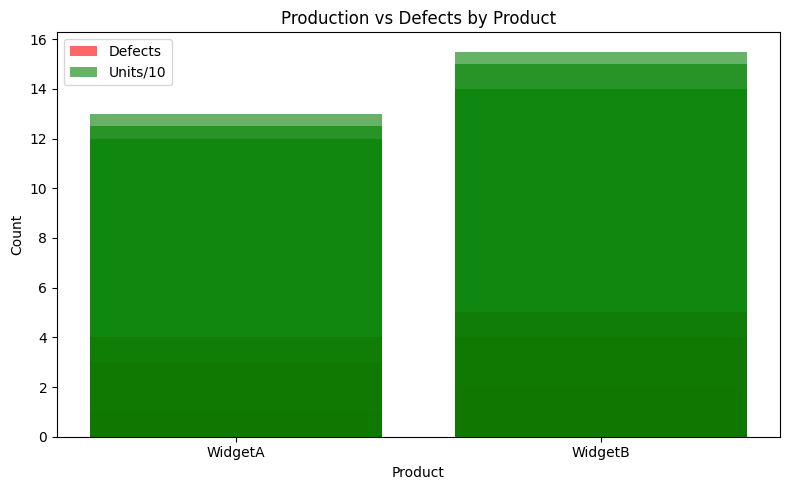

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset as dictionary
production_data = {
    "Date": ["2025-09-28", "2025-09-28", "2025-09-29", "2025-09-29", "2025-09-30", "2025-09-30"],
    "Machine_ID": ["M1", "M2", "M1", "M2", "M1", "M2"],
    "Operator": ["Ravi", "Meena", "Ravi", "Meena", "Kumar", "Meena"],
    "Product": ["WidgetA", "WidgetB", "WidgetA", "WidgetB", "WidgetA", "WidgetB"],
    "Units_Produced": [120, 150, 130, 140, 125, 155],
    "Defects": [4, 2, 3, 5, 1, 4]
}

# Convert to DataFrame
df = pd.DataFrame(production_data)

# Summary
print("=== Production Summary ===")
print(df.describe())

# Recurring defects by product
defect_summary = df.groupby("Product")["Defects"].sum().reset_index()
print("\n=== Total Defects by Product ===\n", defect_summary)

# Efficiency ratio (Units / (Defects+1))
df["Efficiency_Ratio"] = df["Units_Produced"] / (df["Defects"] + 1)

# Machine-wise weekly summary
weekly_summary = df.groupby("Machine_ID")[["Units_Produced", "Defects"]].sum()
print("\n=== Weekly Machine Summary ===\n", weekly_summary)

# Chart: Production vs Defects
plt.figure(figsize=(8, 5))
plt.bar(df["Product"], df["Defects"], color="red", alpha=0.6, label="Defects")
plt.bar(df["Product"], df["Units_Produced"]/10, color="green", alpha=0.6, label="Units/10")
plt.title("Production vs Defects by Product")
plt.xlabel("Product")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# Export to Excel
df.to_excel("Production_Report.xlsx", index=False)


In [3]:
import pandas as pd

# Dataset as dictionary
order_data = {
    "Order_ID": [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    "Customer": ["Alpha Corp", "Beta Ltd", "Gamma Inc", "Alpha Corp", "Beta Ltd", "Delta Co", "Alpha Corp"],
    "Status": ["Pending", "In-Production", "Dispatched", "Pending", "Dispatched", "In-Production", "Pending"],
    "Quantity": [50, 70, 60, 40, 70, 90, 50],
    "Order_Date": ["2025-09-20", "2025-09-21", "2025-09-22", "2025-09-22", "2025-09-23", "2025-09-24", "2025-09-25"]
}

# Convert to DataFrame
orders = pd.DataFrame(order_data)

# Clean and standardize
orders["Status"] = orders["Status"].str.strip().str.title()
orders.drop_duplicates(inplace=True)

# Segregate by order status
pending = orders[orders["Status"] == "Pending"]
in_prod = orders[orders["Status"] == "In-Production"]
dispatched = orders[orders["Status"] == "Dispatched"]

# Summary counts
status_summary = orders["Status"].value_counts()
print("=== Order Status Summary ===\n", status_summary)

# Dashboard-style pivot table
dashboard = orders.pivot_table(index="Customer", columns="Status", values="Quantity", aggfunc="sum", fill_value=0)
print("\n=== Dashboard (Customer vs Status) ===\n", dashboard)

# Export to Excel
with pd.ExcelWriter("Order_Status_Dashboard.xlsx") as writer:
    orders.to_excel(writer, sheet_name="All Orders", index=False)
    dashboard.to_excel(writer, sheet_name="Dashboard")

print("\nExcel dashboard created successfully!")


=== Order Status Summary ===
 Status
Pending          3
In-Production    2
Dispatched       2
Name: count, dtype: int64

=== Dashboard (Customer vs Status) ===
 Status      Dispatched  In-Production  Pending
Customer                                      
Alpha Corp           0              0      140
Beta Ltd            70             70        0
Delta Co             0             90        0
Gamma Inc           60              0        0

Excel dashboard created successfully!
